# <center>ATIVIDADE 5</center>

* **Aula**: Aula 10 - Otimização em Python
* **Data de entrega**: 15/12/23
* **Descrição**: 

Com base no conteúdo apresentado na aula 10 (Otimizações em Python – 08/11/23), verifique o impacto de alguma das sugestões para otimização de código em Python utilizando para isso:
* um programa que você já desenvolveu em Python
* um código na versão em Python de um código que você desenvolveu em outras atividades da disciplina

Para medir o impacto, utilize os módulos timeit ou cProfile para verificar principalmente o tempo de execução. Os grupos devem entregar no e-Disciplinas um texto contendo o que foi feito no trabalho e os resultados da análise.

## Programa Desenvolvido em Python

Em disciplinas introdutórias à Ciência da Computação, desenvolvemos programas completos que realizavam a comparação entre algoritmos de ordenação (tais como Bubble Sort e Quicksort), porém o Python possui uma otimização própria (função Sorted). Portanto, iremos comparar os tempos de execução desses algoritmos com os módulos timeit e também mostraremos um resultado com o cProfile.

## BIBLIOTECAS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import timeit
import sys

from scipy import stats
from cProfile import Profile

## UTILIZAÇÃO DO TIMEIT

### Configurações

In [2]:
# Destravar recursões para o funcionamento do Quicksort.
sys.setrecursionlimit(100000)

### Algoritmos de Ordenação

In [3]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    menores = [x for x in arr if x < pivot]
    iguais = [x for x in arr if x == pivot]
    maiores = [x for x in arr if x > pivot]
    return quicksort(menores) + iguais + quicksort(maiores)

In [4]:
def bubble_sort(lista):
    for i in range(len(lista)):
        for j in range(len(lista) - 1, i, -1):
            if lista[j] < lista[j - 1]:
                lista[j], lista[j - 1] = lista[j - 1], lista[j]
    return lista

#### Testes dos Algoritmos de Ordenação

In [5]:
teste = [x for x in range(10, 0, -1)]
print('Vetor de testes:', teste)
print('Resultado BubbleSort: ', bubble_sort(teste.copy()), end='\n\n')

print('Vetor de testes:', teste)
print('Resultado Quicksort: ', quicksort(teste.copy()), end='\n\n')

print('Vetor de testes:', teste)
print('Resultado Sorted (Otimização do Python): ', sorted(teste.copy()), end='\n\n')

Vetor de testes: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Resultado BubbleSort:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Vetor de testes: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Resultado Quicksort:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Vetor de testes: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Resultado Sorted (Otimização do Python):  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]



### Coletando Tempo de Execução de 10 Simulações com vetores de 20000 posições

In [6]:
lista = [x for x in range(20000, 0, -1)]
results_bubble = [timeit.timeit(lambda: bubble_sort(lista.copy()), number=1) for _ in range(10)]
results_quicksort = [timeit.timeit(lambda: quicksort(lista.copy()), number=1) for _ in range(10)]
results_otimizado = [timeit.timeit(lambda: sorted(lista.copy()), number=1) for _ in range(10)]

### Calculando Intervalos de Confiança dos Resultados

In [7]:
def intervalo_confianca(results, nivel_confianca, tamanho_amostra):
    media = np.mean(results)
    desvio_padrao = np.std(results)
    intervalo = stats.t.interval(nivel_confianca, tamanho_amostra - 1, loc=media, scale=desvio_padrao/np.sqrt(tamanho_amostra))
    return [intervalo[0], intervalo[1]]

In [8]:
def grafico_intervalo(nomes, medias, intervalos, nivel_confianca, algoritmos):
    plt.figure(figsize=(7, 3))
    plt.scatter(nomes, medias, label='Dados')
    plt.errorbar(nomes, medias, yerr=[(upper - lower) / 2 for lower, upper in intervalos], fmt='o', ecolor='red', capsize=5,label=f'Intervalo de Confiança ({nivel_confianca * 100}%)')
    plt.xlabel('Experimentos')
    plt.ylabel('Tempo de Resposta Médio (em s)')
    plt.title(f'Comparação do Tempo de Resposta ({algoritmos})')
    plt.xticks(rotation=0)
    plt.legend()
    plt.grid(True)
    plt.show()

Tamanho das Amostras: 20000
Algoritmos: ['BubbleSort', 'Quicksort', 'Sorted']
Medias: [13.294094971799996, 0.014032782599952043, 7.829480007330858e-05]
Intervalos de Confiança: [[13.29046682410558, 13.297723119494412], [0.014031588935999696, 0.014033976263904391], [7.82847695821012e-05, 7.830483056451597e-05]]


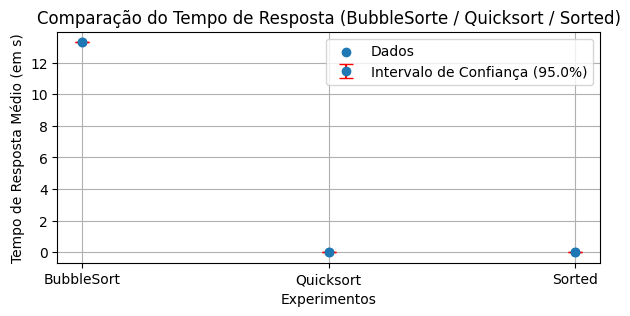

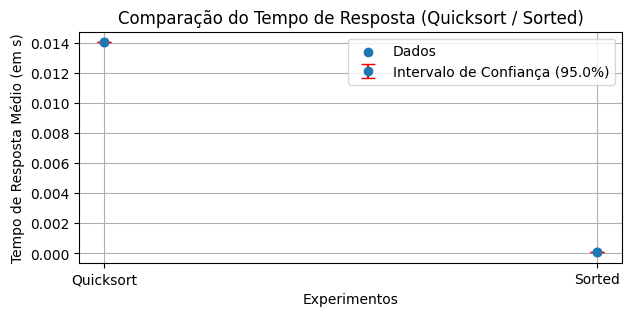

In [9]:
results = [results_bubble, results_quicksort, results_otimizado]
tamanho_amostra = len(lista)
nivel_confianca = 0.95
nomes = ['BubbleSort', 'Quicksort', 'Sorted']
medias = [np.mean(r) for r in results]
intervalos = [intervalo_confianca(r, nivel_confianca, tamanho_amostra) for r in results]

print('Tamanho das Amostras:', tamanho_amostra)
print('Algoritmos:', nomes)
print('Medias:', medias)
print('Intervalos de Confiança:', intervalos)

grafico_intervalo(nomes, medias, intervalos, nivel_confianca, 'BubbleSorte / Quicksort / Sorted')
grafico_intervalo(nomes[1:3], medias[1:3], intervalos[1:3], nivel_confianca, 'Quicksort / Sorted')

## UTILIZANDO O CPROFILE

### Configurando Objetos de Profile

In [10]:
# Configura o profiler
c_bubble = Profile()
c_quicksort = Profile()
c_otimizado = Profile()

### Testes do Bubble Sort

In [11]:
# BubbleSort
c_bubble.enable()
bubble_sort(lista.copy())
c_bubble.disable()
c_bubble.print_stats()

         20045 function calls in 29.126 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   29.126   29.126 1067921384.py:1(<module>)
        1   29.124   29.124   29.126   29.126 2723998441.py:1(bubble_sort)
        2    0.000    0.000    0.000    0.000 codeop.py:117(__call__)
        4    0.000    0.000    0.000    0.000 compilerop.py:180(extra_flags)
        2    0.000    0.000    0.000    0.000 contextlib.py:104(__init__)
        2    0.000    0.000    0.000    0.000 contextlib.py:132(__enter__)
        2    0.000    0.000    0.000    0.000 contextlib.py:141(__exit__)
        2    0.000    0.000    0.000    0.000 contextlib.py:287(helper)
        2    0.000    0.000    0.000    0.000 interactiveshell.py:1253(user_global_ns)
        2    0.000    0.000    0.000    0.000 interactiveshell.py:3464(compare)
        2    0.000    0.000   29.126   14.563 interactiveshell.py:3512(run_code)
        2   

### Teste do Quicksort

In [12]:
# Quicksort
c_quicksort.enable()
quicksort(lista.copy())
c_quicksort.disable()
c_quicksort.print_stats()

         94509 function calls (70893 primitive calls) in 0.045 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  23617/1    0.017    0.000    0.045    0.045 1595105220.py:1(quicksort)
    11808    0.009    0.000    0.009    0.000 1595105220.py:5(<listcomp>)
    11808    0.008    0.000    0.008    0.000 1595105220.py:6(<listcomp>)
    11808    0.009    0.000    0.009    0.000 1595105220.py:7(<listcomp>)
        1    0.000    0.000    0.045    0.045 1970705212.py:1(<module>)
        2    0.000    0.000    0.000    0.000 codeop.py:117(__call__)
        4    0.000    0.000    0.000    0.000 compilerop.py:180(extra_flags)
        2    0.000    0.000    0.000    0.000 contextlib.py:104(__init__)
        2    0.000    0.000    0.000    0.000 contextlib.py:132(__enter__)
        2    0.000    0.000    0.000    0.000 contextlib.py:141(__exit__)
        2    0.000    0.000    0.000    0.000 contextlib.py:287(helper)
        2    0.00

### Teste da Otimização do Python

In [13]:
# Otimizado
c_otimizado.enable()
sorted(lista.copy())
c_otimizado.disable()
c_otimizado.print_stats()

         44 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 1386195684.py:1(<module>)
        2    0.000    0.000    0.000    0.000 codeop.py:117(__call__)
        4    0.000    0.000    0.000    0.000 compilerop.py:180(extra_flags)
        2    0.000    0.000    0.000    0.000 contextlib.py:104(__init__)
        2    0.000    0.000    0.000    0.000 contextlib.py:132(__enter__)
        2    0.000    0.000    0.000    0.000 contextlib.py:141(__exit__)
        2    0.000    0.000    0.000    0.000 contextlib.py:287(helper)
        2    0.000    0.000    0.000    0.000 interactiveshell.py:1253(user_global_ns)
        2    0.000    0.000    0.000    0.000 interactiveshell.py:3464(compare)
        2    0.000    0.000    0.000    0.000 interactiveshell.py:3512(run_code)
        2    0.000    0.000    0.000    0.000 traitlets.py:630(get)
        2    0.000    0